In [1]:
import pandas
import matplotlib.pyplot as plt
# import matplotlib
import pathlib
import numpy as np

cwd = pathlib.Path.cwd()

X = 0
Y = 1
Z = 2
PSI = 0
PHI = 1
LAST = -1

# I tried using C++, I can even send you the code, but I spent more time debugging then actually working on the homework and learning...

Problem 1

In [2]:
class Lorenz():
    '''
    this might be overkill to use a class, but when I wrote this in C++ I used a class and it's just easier to translate that. Also more fun.
    '''
    def __init__(self, x0, y0, z0, t0, tf, s = 10, r = 28, b = 8/3, h = 0.01) -> None:
        self.xn, self.yn, self.zn, self.tn = list(), list(), list(), list()

        self.xn.append(x0), self.yn.append(y0), self.zn.append(z0), self.tn.append(t0)

        self.s = s
        self.r = r
        self.b = b
        self.h = h

        self.tf = int((tf - t0) / self.h)


    def dxdt(self, x: float, y: float, z: float) -> float:
        '''
        dx/dt = s(y - x)
        '''
        return self.s * (y - x)

    def dydt(self, x: float, y: float, z: float) -> float:
        '''
        dy/dt = x(r - z) - y
        '''
        return x * (self.r - z) - y

    def dzdt(self, x: float, y: float, z: float) -> float:
        '''
        dz/dt = xy - bz
        '''
        return x*y - self.b*z
    
    def dxyzdt(self, x: float, y: float, z: float) -> np.array:
        '''
        '''
        x_dot = self.dxdt(x, y, z)
        y_dot = self.dydt(x, y, z)
        z_dot = self.dzdt(x, y, z)

        return np.array([x_dot, y_dot, z_dot])
    
    def time_step(self, t: int):
        '''
        Uses RK4 to find the next value
        '''

        k1 = self.dxyzdt(self.xn[t]                       , self.yn[t]                       , self.zn[t]                       )
        k2 = self.dxyzdt(self.xn[t] + (k1[X] * self.h / 2), self.yn[t] + (k1[Y] * self.h / 2), self.zn[t] + (k1[Z] * self.h / 2))
        k3 = self.dxyzdt(self.xn[t] + (k2[X] * self.h / 2), self.yn[t] + (k2[Y] * self.h / 2), self.zn[t] + (k2[Z] * self.h / 2))
        k4 = self.dxyzdt(self.xn[t] + (k3[X] * self.h    ), self.yn[t] + (k3[Y] * self.h    ), self.zn[t] + (k3[Z] * self.h    ))

        self.xn.append(self.xn[t] + (self.h / 6) * (k1[X] + 2*k2[X] + 2*k3[X] + k4[X]))
        self.yn.append(self.yn[t] + (self.h / 6) * (k1[Y] + 2*k2[Y] + 2*k3[Y] + k4[Y]))
        self.zn.append(self.zn[t] + (self.h / 6) * (k1[Z] + 2*k2[Z] + 2*k3[Z] + k4[Z]))
        self.tn.append(self.tn[t] + self.h)

    def RK4(self):
        '''
        '''
        for t in range(self.tf):
            self.time_step(t)


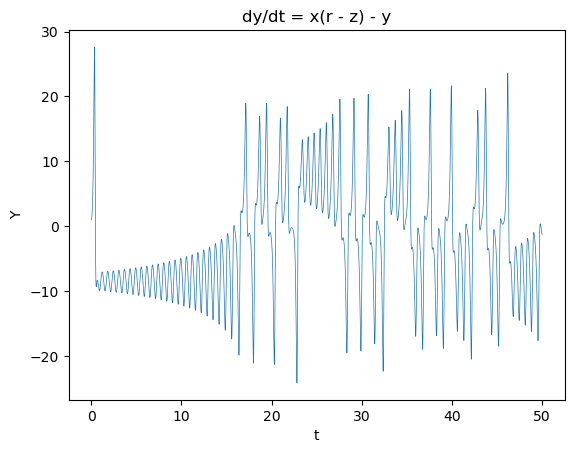

In [3]:
xyz = (0, 1, 0)
t0 = 0
tf = 50

lorenz = Lorenz(xyz[X], xyz[Y], xyz[Z], t0, tf)
lorenz.RK4()

plt.plot(lorenz.tn, lorenz.yn, lw=0.5)
plt.title("dy/dt = x(r - z) - y")
plt.ylabel("Y")
plt.xlabel("t")
plt.show()

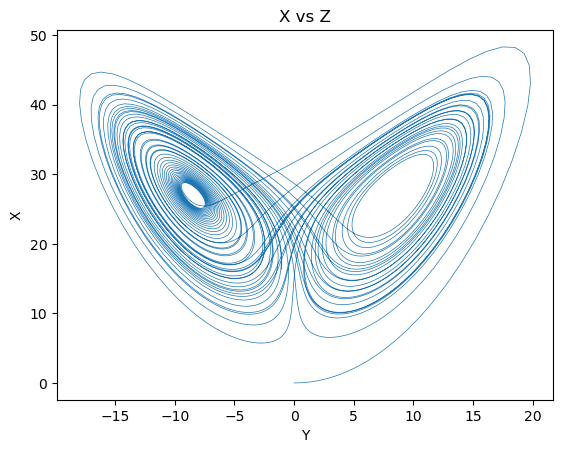

In [4]:
plt.plot(lorenz.xn, lorenz.zn, lw=0.5)
plt.title("X vs Z")
plt.ylabel("X")
plt.xlabel("Y")
plt.show()

I know it says to do an X vs Z, but doing an X, Y, Z plot is a trivial extension

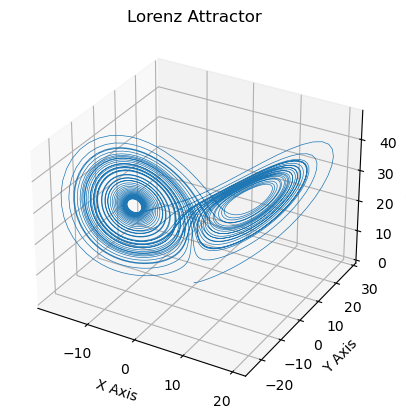

In [5]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(xs = lorenz.xn, ys = lorenz.yn, zs = lorenz.zn, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()

Problem 2

In [6]:

HBAR = 1.0546E-34;  # hbar
ME = 9.109E-31;     # mass of electron
Q = 1.6022E-19;     # electron charge
A = 10**-11;         # Bohr radius (order of magnitude)
V0 = 50*Q

def zero_potential(V0, x, a = A):
    '''
    I used this one to make sure the rest of the code was working.
    '''
    return 0.0

def example_potential(V0, x):
    '''
    This too I used to make sure the code was working.
    '''
    return V0 * (x / (5.2918*A)) * ((x / (5.2918*A)) - 1) 


def haromic_potential(V0, x, a = A):
    '''
    '''
    return V0 * x**2 / a**2

def anharmonic_potential(V0, x, a = A):
    '''
    '''
    return V0 * x**4 / a**4



Example for the square well from the book = 134.56125651104787 ev which should be ~ 134 ev


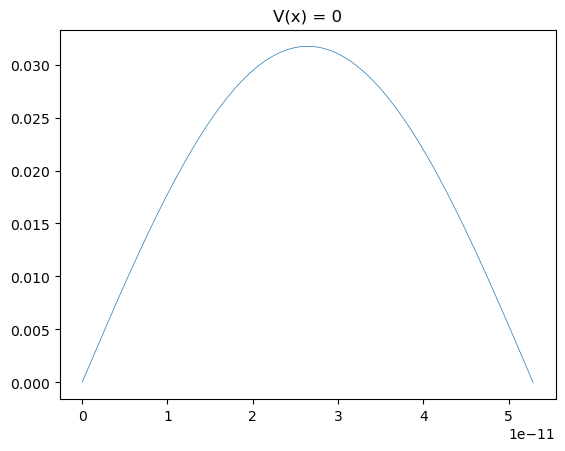


Example for the book, page 397 well from the book = 112.80856631821122 ev which should be ~ 112 ev


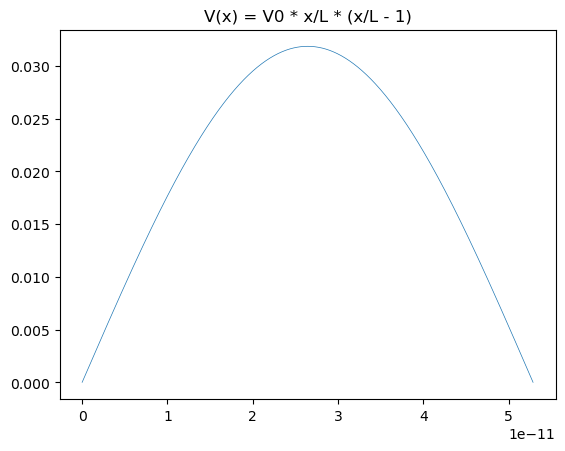

In [7]:


class Oscillator():
    def __init__ (self, V0: float, Bl: float, Br: float, e1: float, e2: float, potential, N: int = 1000) -> None:
        self.V0 = V0  # potential
        self.e1 = e1  # Energy guess 1
        self.e2 = e2  # Energy guess 2
        self.h = (Br - Bl) / N
        self.Bl = Bl  # the left boundary, for integration purposes

        self.potential = potential
        self.points(Bl, N)


    def points(self, Bl, N):
        '''
        Creating a single array of the points I'm going to use, that way I don't need to recreate this every pass.
        '''
        self.well_points = []
        for n in range(N):
            self.well_points.append(Bl + (n*self.h))


    def wavefunction(self, e: float):
        '''
        '''
        wfun = np.array([0.0, 1.0])
        p_function = []

        for x in self.well_points:
            p_function.append(wfun[PSI])  # keeping only the Psi term

            k1 = self.h * self.ODE(wfun         , x             , e)
            k2 = self.h * self.ODE(wfun + 0.5*k1, x + 0.5*self.h, e)
            k3 = self.h * self.ODE(wfun + 0.5*k2, x + 0.5*self.h, e)
            k4 = self.h * self.ODE(wfun +     k3, x +     self.h, e)

            wfun += (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        # print(k1, k2, k3, k4)


        return np.array(p_function)


    def ODE(self, wfun: np.array, x: float, e: float):
        '''
        dpsi/dx = phi

        dphi/dx = (schrodinger equation for potential well)
        '''
        fpsi = wfun[PHI]
        fphi = (2 * ME / HBAR**2) * (self.potential(self.V0, x) - e) * wfun[PSI]

        return np.array([fpsi, fphi])
    

    def secant(self, target = Q/1000):
        '''
        I personally like the bracket method, but that means I need to know roughly where the E is supposed to be
        and it's easier to instead to use a method that doesn't require that knowledge.
        '''

        wave = self.wavefunction(self.e1)
        psi_end_2 = wave[LAST]

        while(abs(self.e1 - self.e2) > target):
            psi_end_1 = psi_end_2
            
            wave = self.wavefunction(self.e2)
            # print(psi2)
            # break
            psi_end_2 = wave[LAST]

            dummy = self.e2
            self.e2 = self.e2 - psi_end_2 * (self.e1 - self.e2) / (psi_end_1 - psi_end_2)
            self.e1 = dummy

            self.psi = wave


    def normalize(self):
        '''
        Making this callable so I don't keep finding the integral over and over again.
        Does so by Simpson's Rule

        Just integrates across half the wavefunction, form the left boundary to the midpoint
        '''
        N = len(self.psi) // 2  # in case I use an Odd number of points, round down
        psi_squ = self.psi * self.psi

        s = psi_squ[0] + psi_squ[N]  # only integrate from the left boundary to the midpoint

        for k in range(1, N//2):
            s += 4 * psi_squ[2*k - 1]

        for k in range(1 , N//2 - 1):
            s += 2 * psi_squ[2*k]

        s = (1 / 3) * s

        self.norm_psi = self.psi / (2 * np.sqrt(s))



# book_example_zero = Oscillator(100*Q, 0, 5.2918*A, 0, Q, zero_potential)
# book_example_zero.secant()
# book_example_zero.normalize()
# print(f"Example for the square well from the book = {book_example_zero.e2 / Q} ev which should be ~ 134 ev")

# plt.plot(book_example_zero.well_points, book_example_zero.norm_psi, lw=0.5)
# plt.title("V(x) = 0")
# # plt.ylabel("X")
# # plt.xlabel("Y")
# plt.show()

# book_example = Oscillator(100*Q, 0, 5.2918*A, 0, Q, example_potential)
# book_example.secant()
# book_example.normalize()
# print(f"\nExample for the book, page 397 well from the book = {book_example.e2 / Q} ev which should be ~ 112 ev")

# plt.plot(book_example.well_points, book_example.norm_psi, lw=0.5)
# plt.title("V(x) = V0 * x/L * (x/L - 1)")
# # plt.ylabel("X")
# # plt.xlabel("Y")
# plt.show()


Harmonic Potential


E ground = 138.0270017827201 ev

E first excited = 414.08100786094326 ev

E second excited = 966.1890227400986 ev


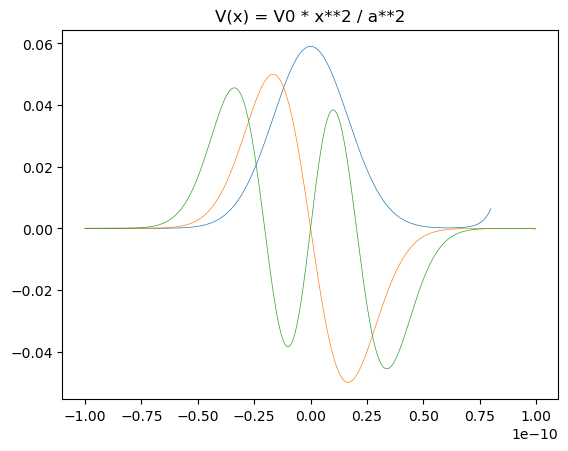

In [8]:
partb_ground = Oscillator(V0, -10*A, 10*A, 0, 1.0*Q, haromic_potential)
partb_ground.secant()
partb_ground.normalize()
E0 = partb_ground.e2 / Q
print(f"\nE ground = {E0} ev")

partb_first = Oscillator(V0, -10*A, 10*A, 1*E0*Q, 3*E0*Q, haromic_potential)
partb_first.secant()
partb_first.normalize()
E1 = partb_first.e2 / Q
print(f"\nE first excited = {E1} ev")

partb_second = Oscillator(V0, -10*A, 10*A, 3*E0*Q, 7*E0*Q, haromic_potential)
partb_second.secant()
partb_second.normalize()
E2 = partb_second.e2 / Q
print(f"\nE second excited = {E2} ev")

plt.plot(partb_ground.well_points[:-100], partb_ground.norm_psi[:-100], lw=0.5)
plt.plot(partb_first.well_points, partb_first.norm_psi, lw=0.5)
plt.plot(partb_second.well_points, partb_second.norm_psi, lw=0.5)
plt.title("V(x) = V0 * x**2 / a**2")
plt.show()

Note on croping: that had to be done because the values at the far end of the ground state blow up so much they drown out the rest of the wavefunctions. This is an artifact of the shooting method. The normalization integration takes place over half the wavefunction (the left half) and the value is multiplied by 2, but the far right region blows up to infinity: so that area is cropped out.

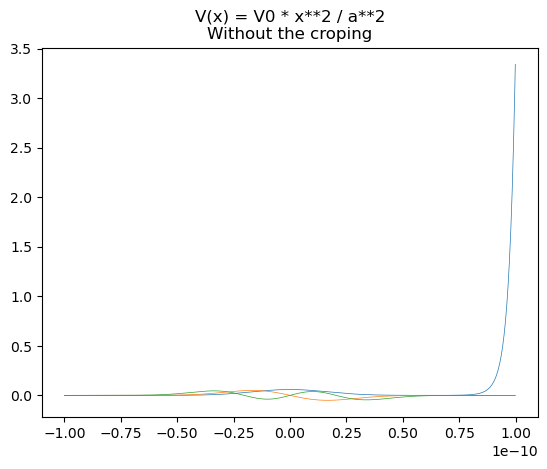

In [9]:
plt.plot(partb_ground.well_points, partb_ground.norm_psi, lw=0.5)
plt.plot(partb_first.well_points, partb_first.norm_psi, lw=0.5)
plt.plot(partb_second.well_points, partb_second.norm_psi, lw=0.5)
plt.title("V(x) = V0 * x**2 / a**2\nWithout the croping")
# plt.ylabel("X")
# plt.xlabel("Y")
plt.show()

Anharmonic Potential


E ground = 205.31291380055697 eV

E first excited = 735.7127842995999 eV

E second excited = 2254.717301611053 eV


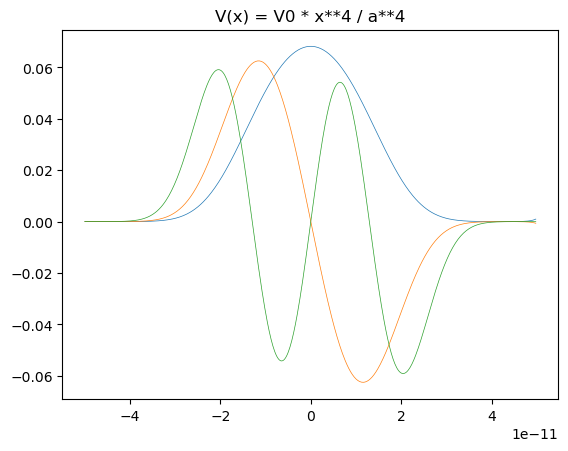

In [10]:
partc_ground = Oscillator(V0, -10*A, 10*A, 0, Q, anharmonic_potential)
partc_ground.secant()
partc_ground.normalize()
E0 = partc_ground.e2 / Q
print(f"\nE ground = {E0} eV")

partc_first = Oscillator(V0, -10*A, 10*A, 400*Q, 600*Q, anharmonic_potential)
partc_first.secant()
partc_first.normalize()
E1 = partc_first.e2 / Q
print(f"\nE first excited = {E1} eV")

partc_second = Oscillator(V0, -10*A, 10*A, 600*Q, 1000*Q, anharmonic_potential)
partc_second.secant()
partc_second.normalize()
E2 = partc_second.e2 / Q
print(f"\nE second excited = {E2} eV")

plt.plot(partc_ground.well_points[250:-250], partc_ground.norm_psi[250:-250], lw=0.5)
plt.plot(partc_first.well_points[250:-250], partc_first.norm_psi[250:-250], lw=0.5)
plt.plot(partc_second.well_points[250:-250], partc_second.norm_psi[250:-250], lw=0.5)
plt.title("V(x) = V0 * x**4 / a**4")
# plt.ylabel("X")
# plt.xlabel("Y")
plt.show()

Problem 3

In [15]:
V0 = 5

def resistor_matrix(N):
    '''
    Makes the matrix of resistors
    '''
    resistors = np.zeros(shape = (N, N))

    for n in range(1, N - 1):
        resistors[n][n] = 4
    
    for n in range(N - 1):
        resistors[n][n + 1] = -1
        resistors[n + 1][n] = -1

    for n in range(N - 2):
        resistors[n][n + 2] = -1
        resistors[n + 2][n] = -1

    resistors[0][0], resistors[N - 1][N - 1] = 3, 3

    voltages = np.zeros(N)
    voltages[0], voltages[1] = V0, V0

    return resistors, voltages


def A2A(A: np.ndarray):
    '''
    Reorganizes the matrix A into the smaller array with the diagnols in each row
    '''
    nrows, ncols = A.shape
    A2 = np.zeros(shape = (nrows, ncols))

    i = nrows
    j = ncols

    while i >= 0:
        if A[j][i] != 0:
            jj = 0
            for ii in range(i, nrows):
                A2[ii][jj] = A[ii][jj]
                jj += 1

        i -= 1

    return A2, A


def banded(Aa: np.ndarray, va: np.ndarray, up: int, down: int) -> np.ndarray:
    '''
    Copied from page 525 in the texbook. I got lazy... sorry
    '''

    A = np.copy(Aa)
    v = np.copy(va)
    N = len(v)
    print(A)

    # Gausian elimination
    for m in range(N):

        # Normalize factor
        div = A[up, m]
        print(div, up, m)

        # Update vector first
        v[m] /= div 
        for k in range(1, down + 1):
            if m + k < N:
                v[m + k] -= A[up + k, m] * v[m]

        #Now normalize and subtract the pivot row
        for i in range(up):
            j = m + up - i
            if j < N:
                A[i, j] /= div
                for k in range(1, down + 1):
                    A[i + k, j] -= A[up + k, m] * A[i, j]

    #Backsubsitution
    for m in range(N - 2, -1, -1):
        for i in range(up):
            j = m + up - i
            if j < N:
                v[m] -= A[i, j]*v[j]

    return v


A, v = resistor_matrix(6)
Aa, A = A2A(A)
print(A)
print(Aa)

# v_ = banded(A, v, 2, 2)

# print(v_)



[[ 3. -1. -1.  0.  0.  0.]
 [-1.  4. -1. -1.  0.  0.]
 [-1. -1.  4. -1. -1.  0.]
 [ 0. -1. -1.  4. -1. -1.]
 [ 0.  0. -1. -1.  4. -1.]
 [ 0.  0.  0. -1. -1.  3.]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
